In [32]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sc
from scipy import stats
import sklearn

%matplotlib inline

for file in os.listdir("house-prices-advanced-regression-techniques"):
    print(file)


sample_submission.csv
test.csv
train.csv
data_description.txt


In [33]:
def rmse(one,other):
    return (np.mean((one - other)**2))**0.5

In [34]:
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
train_data = train_data.drop(columns = 'Id')

In [35]:
missing_percent = (train_data.isna().sum(axis = 0) / len(train_data))
cols_to_remove = missing_percent[missing_percent > 0.5].index

In [36]:
train_data = train_data.drop(columns = cols_to_remove)

## Numerical Data
Exclude all categorical variables and only use numerical variables

In [37]:
numerical_train_data = train_data.drop(columns = train_data.columns[train_data.dtypes == 'object'])

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
train,test = train_test_split(numerical_train_data,test_size = 0.2)
train.fillna(0,inplace = True),test.fillna(0,inplace = True)
train_x,train_y = train.drop(columns = 'SalePrice').to_numpy(),train['SalePrice'].to_numpy()
test_x,test_y = test.drop(columns = 'SalePrice').to_numpy(),test['SalePrice'].to_numpy()

/home/alexhetherington/.local/lib/python3.8/site-packages/pandas/core/frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [39]:
scaler = MinMaxScaler().fit(train_x)
train_x,test_x = scaler.transform(train_x),scaler.transform(test_x)
scaler = MinMaxScaler().fit(train_y[:,None])
train_y,test_y = scaler.transform(train_y[:,None]),scaler.transform(test_y[:,None])

### Fully Connected NN

In [40]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1L2
model = Sequential()
model.add(Dense(150,activation = 'relu',input_shape = (36,)))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(25,activation = 'relu'))
model.add(Dense(1,activation = 'relu'))
model.compile(optimizer = Adam(learning_rate = 1e-4),loss = 'mape')

In [41]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 150)               5550      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_13 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 26        
Total params: 27,001
Trainable params: 27,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(train_x,train_y,epochs = 30,batch_size = 1,verbose = 0)

Text(0.5, 0, 'True')

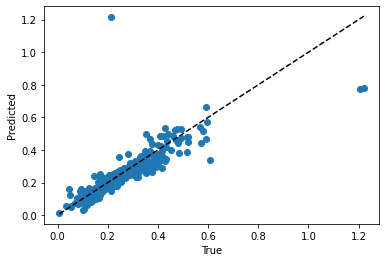

In [43]:
fig,ax = plt.subplots()
plt.scatter(test_y,model.predict(test_x))
ax.plot([test_y.min(),test_y.max()],[test_y.min(),test_y.max()],'k--')
plt.ylabel('Predicted')
plt.xlabel('True')

In [44]:
print('rmse :',rmse(model.predict(test_x),test_y))

rmse : 0.08184722173479632


### KNN

3



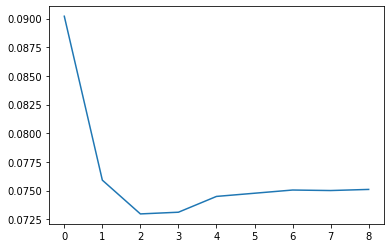

In [45]:
from sklearn.neighbors import KNeighborsRegressor as Knn

candidate_rmse = []
for i in range(1,10):
    knn_model = Knn(i)
    knn_model.fit(train_x,train_y)
    candidate_rmse.append(rmse(knn_model.predict(test_x),test_y))
n = np.array(candidate_rmse).argmin() + 1
print(n)
plt.plot(candidate_rmse)
print()

In [46]:
knn_model = Knn(n)
knn_model.fit(train_x,train_y)
knn_preds = knn_model.predict(test_x)

Text(0.5, 0, 'True')

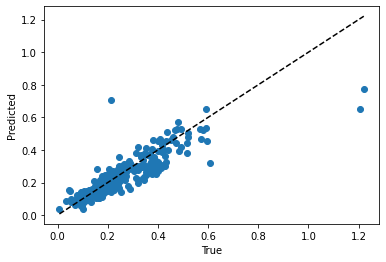

In [47]:
fig,ax = plt.subplots()
plt.scatter(test_y,knn_preds)
ax.plot([test_y.min(),test_y.max()],[test_y.min(),test_y.max()],'k--')
plt.ylabel('Predicted')
plt.xlabel('True')

In [48]:
print('rmse :',rmse(knn_preds,test_y))

rmse : 0.0729580567266134


### Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor as Rfr
rfr = Rfr(50,max_depth = 15,min_samples_leaf = 5)
rfr.fit(train_x,train_y.ravel())
rfr_preds = rfr.predict(test_x)

Text(0.5, 0, 'True')

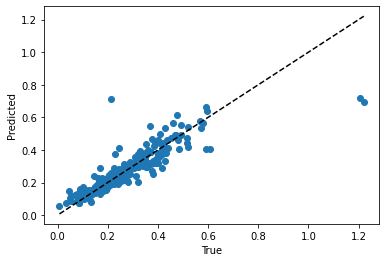

In [65]:
fig,ax = plt.subplots()
plt.scatter(test_y,rfr_preds)
ax.plot([test_y.min(),test_y.max()],[test_y.min(),test_y.max()],'k--')
plt.ylabel('Predicted')
plt.xlabel('True')

In [66]:
print(rmse(rfr_preds,test_y))

0.1905591789093865
